In [2]:
from bank import Bank
from players import SesquaGreedyPlayer, GreedyPlayer, ThersholdPlayer
import matplotlib.pyplot as plt
import numpy as np

In [3]:
number_of_rounds = [i for i in range(1, 100)]

threshold = 250

sesqua_win_pct = []
sesqua_tie_pct = []
greedy_win_pct = []
greedy_tie_pct = []

thresh_win_pct_sesqua = []
thresh_win_pct_greedy = []


for rounds in number_of_rounds:
    print(rounds)
    players = [SesquaGreedyPlayer(), ThersholdPlayer(threshold=threshold)]
    win_pct, tie_pct = Bank.estimate_win_probability(players, rounds=rounds, num_simulations=1000)
    sesqua_win_pct.append(win_pct[0])
    sesqua_tie_pct.append(tie_pct[0])
    thresh_win_pct_sesqua.append(win_pct[1])


    players = [GreedyPlayer(), ThersholdPlayer(threshold=threshold)]
    win_pct, tie_pct = Bank.estimate_win_probability(players, rounds=rounds, num_simulations=1000)
    greedy_win_pct.append(win_pct[0])
    greedy_tie_pct.append(tie_pct[0])
    thresh_win_pct_greedy.append(win_pct[1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


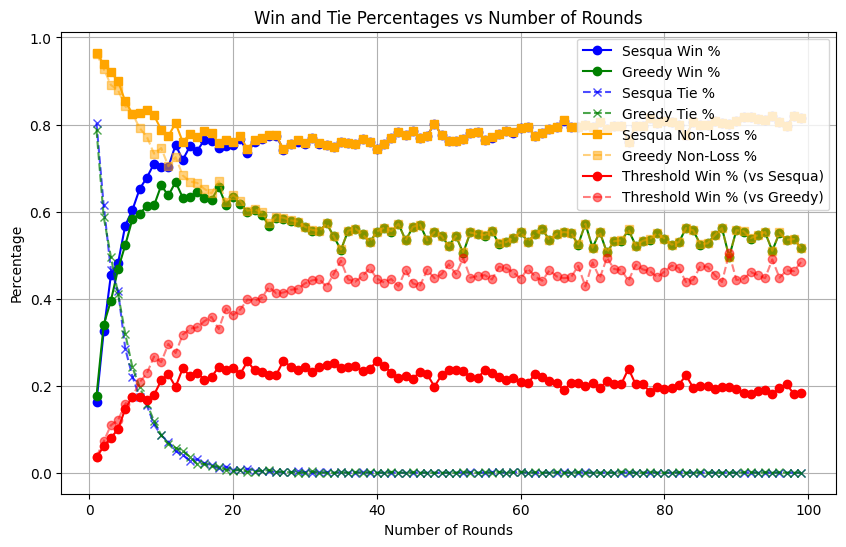

In [4]:

plt.figure(figsize=(10, 6))
plt.plot(number_of_rounds, sesqua_win_pct, label="Sesqua Win %", marker='o', color='blue')
plt.plot(number_of_rounds, greedy_win_pct, label="Greedy Win %", marker='o', color='green')
plt.plot(number_of_rounds, sesqua_tie_pct, label="Sesqua Tie %", marker='x', linestyle='--', color='blue', alpha=0.7)
plt.plot(number_of_rounds, greedy_tie_pct, label="Greedy Tie %", marker='x', linestyle='--', color='green', alpha=0.7)
# Non-loss rate is (win % + tie %) for each strategy.
sesqua_non_loss = [w + t for w, t in zip(sesqua_win_pct, sesqua_tie_pct)]
greedy_non_loss = [w + t for w, t in zip(greedy_win_pct, greedy_tie_pct)]
plt.plot(number_of_rounds, sesqua_non_loss, label="Sesqua Non-Loss %", color='orange', linestyle='-', marker='s')
plt.plot(number_of_rounds, greedy_non_loss, label="Greedy Non-Loss %", color='orange', linestyle='--', marker='s', alpha=0.5)
# threshold win %
plt.plot(number_of_rounds, thresh_win_pct_sesqua, label="Threshold Win % (vs Sesqua)", color='red', linestyle='-', marker='o')
plt.plot(number_of_rounds, thresh_win_pct_greedy, label="Threshold Win % (vs Greedy)", color='red', linestyle='--', marker='o', alpha=0.5)
plt.xlabel("Number of Rounds")
plt.ylabel("Percentage")
plt.title("Win and Tie Percentages vs Number of Rounds")
plt.legend()
plt.grid(True)
plt.savefig("round_effect.png")
plt.show()
